In [7]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

initial = 32498.39
months = 36
inf = float('inf')
net_gain = 5000
curr_time = datetime.now()
bank_base = {"DBS": [0,50000,100000,inf], 
             "DBS_bare": [0,10000, inf], 
             "UOB":[0,15000,30000,45000,60000,75000, inf], 
             "OCBC_bare":[0, 25000, 50000, 75000, inf], 
             "SC":[0, 80000,inf]}
bank_int = {"DBS": [0.008,0.016,0.0005],
            "DBS_bare": [0.004,0.0005], 
            "UOB":[0.005, 0.0055,0.0065,0.008,0.025,0.005],
            "OCBC_bare":[0.0045, 0.0085, 0.021,0.0005], 
            "SC":[0.0038,0.0001]} # p.a. compounded monthly
bank_min_amt_rate = {"OCBC_bare":["base>=200000", 0.004, "75000"]} # condition, int, eligible amt
banks = ["DBS", "DBS_bare", "UOB", "OCBC_bare", "SC"]
# banks = ["OCBC_bare"]
data_pts = dict(zip(banks,[[] for _ in range(len(banks))]))

def get_time_months_away(m):
    t = datetime.now() + relativedelta(months=+m)
    return datetime.strptime(str((t.month%12)+1),"%m").strftime("%B") + " " + str(t.year)
def get_savings_per_month():
    print("Initial", initial)
    for b in banks:
        base = initial
        ints = [i/12 for i in bank_int[b]]
        for m in range(months):
            res = 0
            if b in bank_min_amt_rate and eval(bank_min_amt_rate[b][0]):
                res += bank_min_amt_rate[b][1]*eval(bank_min_amt_rate[b][2])
            res += sum([max(0, min(base, bank_base[b][i+1])-bank_base[b][i]) * ints[i] for i in range(len(bank_int[b]))])
            base += (res+net_gain)
            data_pts[b].append(base)
            print(b, get_time_months_away(m), ":", base)
            
get_savings_per_month()

Initial 32498.39
DBS July 2022 : 37520.05559333333
DBS August 2022 : 42545.06896372889
DBS September 2022 : 47573.43234303804
DBS October 2022 : 52605.147964600066
DBS November 2022 : 57641.954828552865
DBS December 2022 : 62685.477434990935
DBS January 2022 : 67735.7247382376
DBS February 2023 : 72792.70570455525
DBS March 2023 : 77856.42931216133
DBS April 2023 : 82926.90455124421
DBS May 2023 : 88004.1404239792
DBS June 2023 : 93088.1459445445
DBS July 2023 : 98178.93013913723
DBS August 2023 : 103276.50204598941
DBS September 2023 : 108376.638566908
DBS October 2023 : 113476.98759351496
DBS November 2023 : 118577.54913466469
DBS December 2023 : 123678.32319921197
DBS January 2023 : 128779.30979601193
DBS February 2024 : 133880.5089339201
DBS March 2024 : 138981.92062179235
DBS April 2024 : 144083.54486848493
DBS May 2024 : 149185.38168285444
DBS June 2024 : 154287.43107375788
DBS July 2024 : 159389.69305005262
DBS August 2024 : 164492.16762059636
DBS September 2024 : 169594.8547942

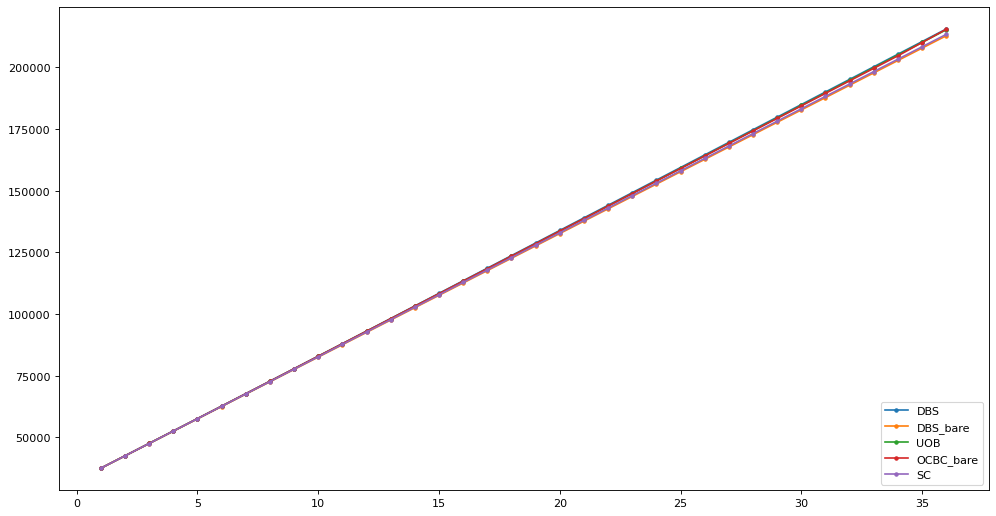

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 8), dpi=80)
for k, v in data_pts.items():
    plt.plot(range(1, len(v) + 1), v, '.-', label=k)
#     plt.text(a, b, str(b))
plt.legend(loc='lower right')

In [286]:
last = [i[-1] for i in data_pts.values()]
[i-min(last) for i in last]

[486.6453806885984,
 0.0,
 372.66363220871426,
 446.80795482547546,
 154.17195590298797]

In [258]:
data_pts.keys()

dict_keys(['DBS', 'DBS_bare', 'UOB', 'OCBC_bare'])

In [283]:
last

[87257.77756478952, 86771.13218410092, 87143.79581630963, 87217.9401389264]

In [201]:
10000*(1+(0.004/12))+(i2-10000)*(1+(0.0005/12))+5000

87765.93379451628

In [183]:
data_pts

{'DBS': [37729.19492666666,
  42754.347723284445,
  47782.850621766636,
  52814.70585551448,
  57851.792129988506,
  62895.59451949516,
  67946.12197885448,
  73003.38347482629,
  78067.38798612606,
  83138.1445034409,
  88215.66202944549,
  93299.94957881808],
 'DBS_bare': [37711.66947458333,
  42716.15746081144,
  47720.853967372306,
  52725.75900295428,
  57730.87257624607,
  62736.19469593674,
  67741.72537071574,
  72747.46460927285,
  77753.41242029823,
  82759.56881248241,
  87765.93379451626,
  92772.50737509102],
 'UOB': [37721.981502916664,
  42739.28924289741,
  47759.31469123731,
  52782.4042343648,
  57808.84250385438,
  62838.63173219028,
  67875.79554829901,
  72923.4534556913,
  77981.62731705733,
  83045.36966177277,
  88111.22189913184,
  93179.18490825647],
 'OCBC_bare': [37722.22440125,
  42740.61097686755,
  47762.55224297617,
  52788.05071748161,
  57820.01313957053,
  62860.78149589811,
  67910.37119684927,
  72968.7976797771,
  78036.07640905005,
  83107.0362455

In [278]:
10*12*100/32000

0.375

In [3]:
32498.39-float(25000)

7498.389999999999

In [4]:
7498.39*(1+(0.016/12)) + 25000*(1+(0.008/12))

32525.054519999998

In [9]:
32525.054519999998-initial

26.664519999998447

In [10]:
26.664519999998447/32498.39

0.000820487414914968

In [11]:
0.000820487414914968*12*100

0.9845848978979617